In [107]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import os

#### Loading dataset into TF Dataset

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    batch_size = 32,
    image_size = (256, 256)
)


Found 2151 files belonging to 3 classes.


In [91]:
classes = dataset.class_names

In [92]:
print(classes)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [11]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape) # batch,size,size,rgb
    break

(32, 256, 256, 3)


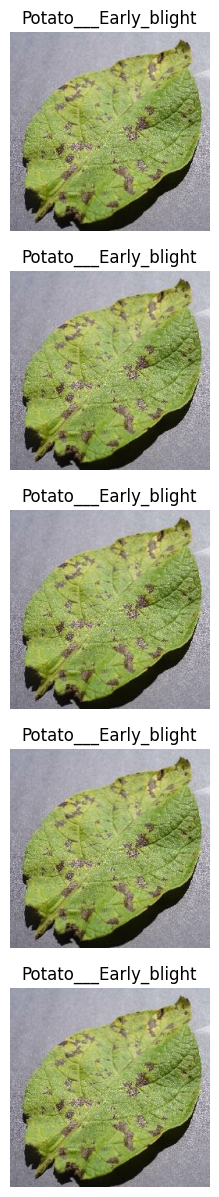

In [93]:
plt.figure(figsize=(10,15))
for image_batch, label_batch in dataset.take(1):
    for i in range(5):
        ax = plt.subplot(5,1,i+1)
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(classes[label_batch[0]])
        plt.axis("off")

#### Train-Test Split

In [31]:
train_size = int(0.8*len(dataset))
train_ds = dataset.take(train_size)

test_ds = dataset.skip(train_size)

val_size = 0.1
val_size = int(val_size * train_size)
val_ds = test_ds.take(6)

test_ds = test_ds.skip(6)


In [32]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

54
6
8


In [36]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [38]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(256, 256),
    layers.Rescaling(1.0 / 255)
])


#### Data Augmentation


In [40]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

#### Building a Model

In [63]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(256, 256, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(3, activation="softmax")
])

model.build(input_shape=(32, 256, 256, 3))

c:\python\NLP\fbs\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (32, 12, 12, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (32, 6, 6, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (32, 4608)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (32, 3)                │        13,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 180,931 (706.76 KB)

 Trainable params: 180,931 (706.76 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [66]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 50,
    batch_size = 32,
    verbose = 1
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.4896 - loss: 0.9468 - val_accuracy: 0.6302 - val_loss: 0.7998
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.7811 - loss: 0.5819 - val_accuracy: 0.8646 - val_loss: 0.3397
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.8406 - loss: 0.4026 - val_accuracy: 0.9271 - val_loss: 0.2093
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.8855 - loss: 0.3081 - val_accuracy: 0.9219 - val_loss: 0.2145
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.8855 - loss: 0.2593 - val_accuracy: 0.9323 - val_loss: 0.1968
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.9408 - loss: 0.1748 - val_accuracy: 0.9583 - val_loss: 0.1427
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.9301 - loss: 0.1774 - val_accuracy: 0.9323 - val_loss: 0.1946
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.9378 - loss: 0.1546 - val_accuracy: 0.9427 - v

In [94]:
scores = model.evaluate(test_ds)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 342ms/step - accuracy: 0.9918 - loss: 0.0284


In [95]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

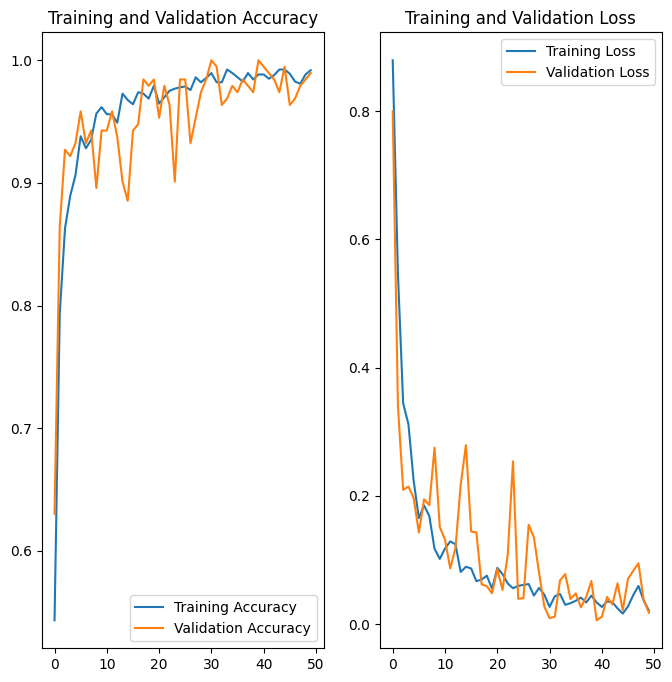

In [96]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(50), acc, label="Training Accuracy")
plt.plot(range(50), val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(50), loss, label="Training Loss")
plt.plot(range(50), val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

plt.show()

first image prediction: 
actual label:  Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
predicted label:  Potato___Late_blight


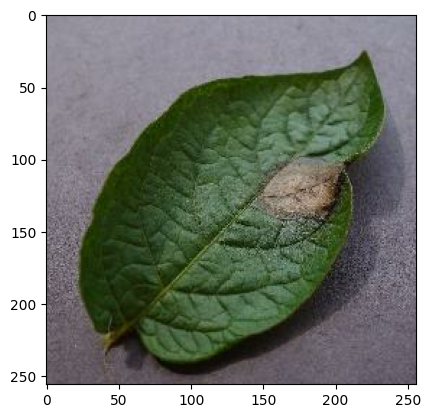

In [103]:
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0]

    print("first image prediction: ")
    plt.imshow(first_image)
    print("actual label: ", classes[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label: ", classes[tf.argmax(batch_prediction[0])])

In [117]:
import pickle

# Save the model using pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
print("Model saved using pickle.")

Model saved using pickle.


In [118]:
# Load the model using pickle
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
print("Model loaded using pickle.")
loaded_model.summary()


Model loaded using pickle.


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (32, 12, 12, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (32, 6, 6, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (32, 4608)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (32, 3)                │        13,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 542,795 (2.07 MB)

 Trainable params: 180,931 (706.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 361,864 (1.38 MB)